### Weather Data API Sample

* Key feature is to ease data accessibility, using only location, time range, and parameters. 
* Data is returned in column-wise JSON format.

In [1]:
import seaborn as sns
sns.set(style="darkgrid")
import json
import requests
import pandas as pd

params= {'param': ['temperature', 'dewpoint_temperature', 'wind_speed', 'total_precipitation'],
          'start': '1980-01-01',                
          'end': '2019-12-31',
          'lat': 14.52,
          'lon': -15.53,
          'freq': 'D',
          'api-key': 'INSERT-YOUR-API-KEY-HERE'
        }

r = requests.get('https://api.oikolab.com/weather', params=params)

weather_data = json.loads(r.json()['data'])
df = pd.DataFrame(index = pd.to_datetime(weather_data['index'],unit = 's'),
                  data = weather_data['data'],
                  columns = weather_data['columns'])
df.index.name = 'datetime'

print('Processing time: %s seconds'% r.json()['attributes']['processing_time'])

Processing time: 2.326 seconds


In [2]:
df.head()

,temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),total_precipitation (mm of water equivalent)
datetime,,,,
1980-01-01,24.35,3.42,3.10,0.0
1980-01-02,24.79,5.73,2.36,0.0
1980-01-03,24.43,6.59,2.14,0.0
1980-01-04,23.27,6.98,2.06,0.0
1980-01-05,23.49,6.39,2.17,0.0


<AxesSubplot:xlabel='datetime'>

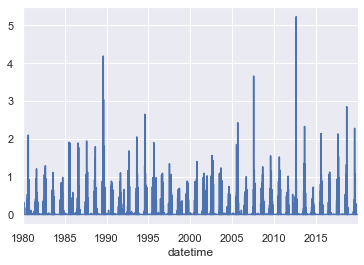

In [3]:
df['total_precipitation (mm of water equivalent)'].plot()

<AxesSubplot:>

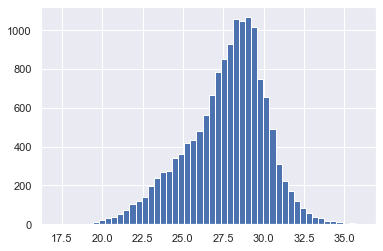

In [4]:
df['temperature (degC)'].hist(bins=50)

<AxesSubplot:xlabel='datetime'>

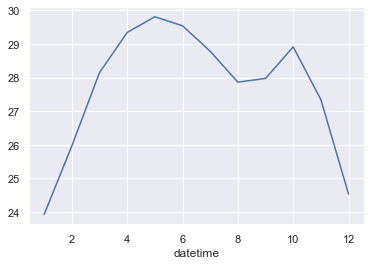

In [5]:
df.groupby(df.index.month).mean()['temperature (degC)'].plot()

<AxesSubplot:xlabel='datetime'>

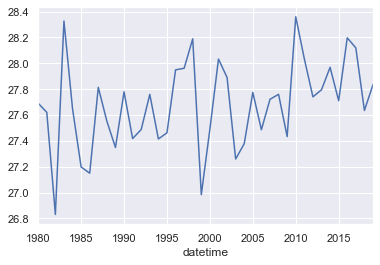

In [6]:
df.resample('Y').mean()['temperature (degC)'].plot()